In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import sklearn as sns

In [5]:
import matplotlib.pyplot as plt


In [6]:
%matplotlib inline


In [7]:
import tensorflow as tf


In [8]:
from tensorflow.keras import Sequential


In [9]:
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D


In [10]:
from tensorflow.keras.optimizers import Adam


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
from sklearn.preprocessing import StandardScaler


In [14]:
df = pd.read_csv(r"C:\Users\abbas\OneDrive\Desktop\project\codelearn\creditcard.csv")


In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.shape

(284807, 31)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.Class.unique()


array([0, 1], dtype=int64)

In [19]:
df.Class.value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [20]:
nf = df[df.Class==0]


In [21]:
f = df[df.Class==1]


In [22]:
nf = nf.sample(738)


In [23]:
data = f.append(nf,ignore_index=True)


In [24]:
data.shape


(1230, 31)

In [25]:
X = data.drop(['Class'],axis=1)


In [26]:
y=data['Class']


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)


In [28]:
X_train.shape,X_test.shape


((984, 30), (246, 30))

In [29]:
scaler=StandardScaler()


In [30]:
X_train=scaler.fit_transform(X_train)


In [31]:
X_test=scaler.transform(X_test)


In [32]:
y_train=y_train.to_numpy()


In [33]:
y_test=y_test.to_numpy()


In [34]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)


In [35]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [36]:
model=Sequential()


In [37]:
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))


In [38]:
model.add(BatchNormalization())


In [39]:
model.add(Dropout(0.2))


In [40]:
model.add(Conv1D(64,2,activation='relu'))


In [41]:
model.add(BatchNormalization())


In [42]:
model.add(Dropout(0.5))


In [43]:
model.add(Flatten())


In [44]:
model.add(Dense(64,activation='relu'))


In [45]:
model.add(Dropout(0.5))


In [46]:
model.add(Dense(1,activation='sigmoid'))


In [47]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [48]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


In [49]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))


Epoch 1/20
31/31 [==============================] - 3s 20ms/step - loss: 0.6887 - accuracy: 0.6819 - val_loss: 0.5936 - val_accuracy: 0.8537
Epoch 2/20
31/31 [==============================] - 0s 10ms/step - loss: 0.3685 - accuracy: 0.8547 - val_loss: 0.5255 - val_accuracy: 0.8455
Epoch 3/20
31/31 [==============================] - 0s 14ms/step - loss: 0.3282 - accuracy: 0.8791 - val_loss: 0.4728 - val_accuracy: 0.8740
Epoch 4/20
31/31 [==============================] - 0s 12ms/step - loss: 0.3019 - accuracy: 0.8933 - val_loss: 0.4251 - val_accuracy: 0.8902
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.2699 - accuracy: 0.8963 - val_loss: 0.3801 - val_accuracy: 0.9187
Epoch 6/20
31/31 [==============================] - 0s 9ms/step - loss: 0.2705 - accuracy: 0.9085 - val_loss: 0.3374 - val_accuracy: 0.9228
Epoch 7/20
31/31 [==============================] - 0s 9ms/step - loss: 0.2473 - accuracy: 0.9146 - val_loss: 0.2972 - val_accuracy: 0.9268
Epoch 8/20
31/3

In [51]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

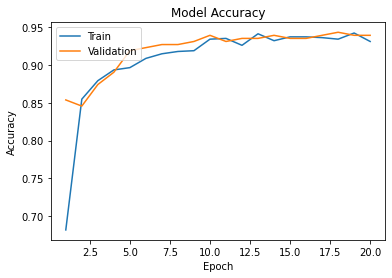

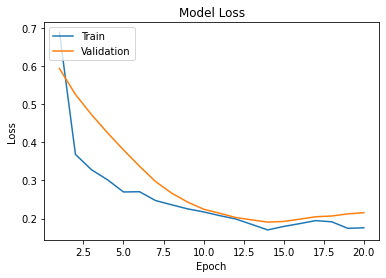

In [52]:
plotLearningCurve(history,20)
